# Ejercicio SOM: Iris Dataset

## Inicializamos las librerías

In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

### Librerías de sklearn para este problema

In [2]:
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom

## Cargamos el dataset Iris

In [3]:
iris= datasets.load_iris()

In [4]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [5]:
df["target_cat"] = np.where(df["target"] == 0, "setosa",np.where(df["target"] == 1, "versicolor","virginica"))

## SOM

## Vamos primero a normalizar los datos (media 0 y desviación típica 1)

In [6]:
scaler = StandardScaler()

In [7]:
df_norm = df.copy()

In [8]:
df_norm[iris["feature_names"]] = scaler.fit_transform(df_norm[iris["feature_names"]])

In [9]:
df_norm.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   target target_cat  
0     0.0     setosa  
1     0.0     setosa  
2     0.0     setosa  
3     0.0     setosa  
4     0.0     setosa

In [10]:
df_norm["target"] = df_norm["target"].astype("int")

Para tener una visión general de cómo se distribuyen las muestras en el mapa, se puede utilizar un gráfico de dispersión donde cada punto representa las coordenadas de la neurona ganadora. Se agrega un desplazamiento aleatorio para evitar superposiciones entre puntos dentro de la misma celda.

In [11]:
X = df_norm[iris["feature_names"]].values

In [12]:
som = MiniSom(6, 6, 4, sigma=0.3, learning_rate=0.5) # Inicializamos un mapa de 6x6 neuronas y 4 features
som.train(X, 100) # entrenamos el SOM con 100 iteraciones

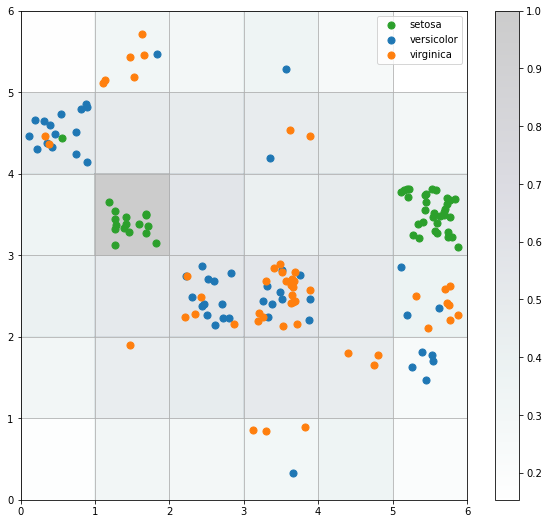

In [13]:
w_x, w_y = zip(*[som.winner(d) for d in X])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()
colors = ["C0", "C1", "C2"]

for c in np.unique(df_norm["target"]):
    idx_target = df_norm["target"]==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], 
                label=df_norm["target_cat"].unique()[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

**Inicialización y entrenamiento**: se crea una instancia de la clase MiniSom. Los parámetros n_neurons y m_neurons definen el tamaño de la red neuronal (6x6 en este caso). El tercer parámetro es el número de características en los datos. El parámetro sigma es el radio de los diferentes barrios en la red, y learning_rate es la tasa de aprendizaje. La función de vecindad utilizada es la gaussiana. Por último, se establece una semilla para la reproducibilidad de los resultados.

**Entrenamiento del SOM**: se inicializan los pesos de la red con los dos primeros componentes principales de los datos. Luego, se entrena la red con los datos durante 1000 iteraciones.

**Búsqueda de ganadores**: para cada dato, se encuentra la neurona ganadora en el mapa, es decir, la neurona cuyo vector de pesos es más similar al dato de entrada. Se guardan las coordenadas de estas neuronas en w_x y w_y.

**Visualización del SOM**: se crea una gráfica donde se muestra el mapa de distancias entre las neuronas del SOM. Cada neurona es coloreada de acuerdo con su distancia media a las neuronas vecinas, donde los colores más oscuros representan distancias mayores. Además, se grafican los datos en el mapa de acuerdo a la neurona ganadora para cada uno. Cada dato es representado por un punto cuyo color está determinado por su clase (según la variable 'target'). Los puntos son dispersados alrededor de su neurona ganadora para mejorar la visualización en caso de superposición.

En conclusión, la interpretación de la salida del código es la siguiente: cada neurona en el mapa representa un grupo de datos similares. Las neuronas cercanas en el mapa representan grupos de datos que son similares entre sí. La coloración del mapa indica la estructura de los datos: las regiones oscuras indican transiciones abruptas entre diferentes grupos de datos, mientras que las regionas claras indican transiciones suaves. Los puntos en el mapa indican la clase de los datos, lo que puede proporcionar una intuición acerca de cómo las diferentes clases se distribuyen en el espacio de las características de los datos.

Cuando se trata de un problema supervisado, se puede visualizar la proporción de muestras por clase que caen en una neurona específica utilizando un gráfico circular por neurona:

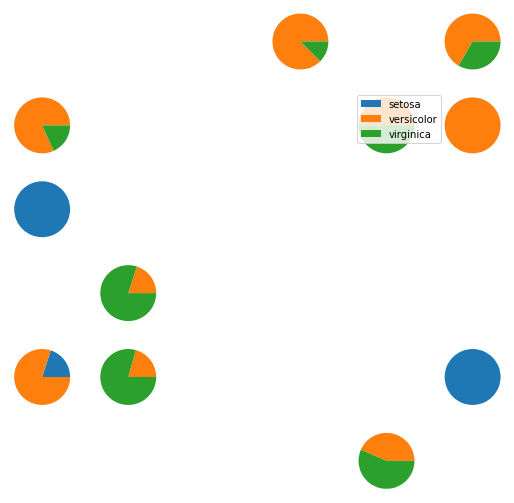

In [57]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(X, [df_norm["target_cat"].unique()[t] for t in df_norm["target"]])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(6, 6, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in df_norm["target_cat"].unique()]
    plt.subplot(the_grid[6-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, df_norm["target_cat"].unique(), loc = "upper left")
plt.show()